In [1]:
%matplotlib widget

import sys
import os
import h5py
from copy import deepcopy
from matplotlib import pyplot as plt

In [2]:
#basepath = '/Volumes/Storage/thesis_data'
#basepath = '/mnt/d/thesis_data'
basepath = './data/'
filepath = os.path.abspath(basepath+"/fate-predict-datasets/Alice/raw-data/silja_dataset_1_T0_predictions_fused.h5")
#filepath = os.path.abspath(basepath+"/train-multiclass-unet/2class/train/T45_ziwei_binary_small.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())

Keys: <KeysViewHDF5 ['fused_data']>


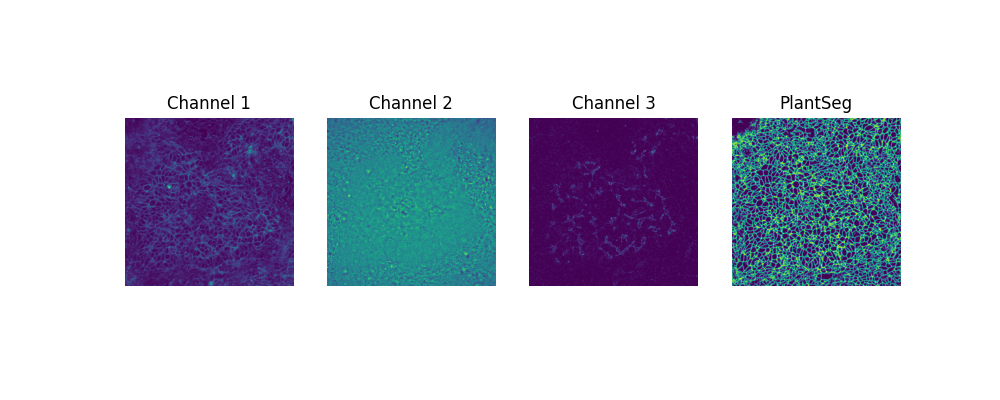

In [3]:
def display_channels(img, z=32, cmap='inferno'):
    fig = plt.figure(figsize=(10, 4))
      
    # setting values to rows and column variables
    rows = 1
    columns = 4
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img[0,z,:,:], cmap=cmap)
    plt.axis('off')
    plt.title('Channel 1')
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(img[1,z,:,:], cmap=cmap)
    plt.axis('off')
    plt.title('Channel 2')
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(img[2,z,:,:], cmap=cmap)
    plt.axis('off')
    plt.title('Channel 3')

    fig.add_subplot(rows, columns, 4)
    plt.imshow(img[3,z,:,:], cmap=cmap)
    plt.axis('off')
    plt.title('PlantSeg')

    return fig

fig = display_channels(f1['fused_data'], z=32, cmap='viridis');
#fig = display_channels(f1['raw'], z=32, cmap='viridis');

fig.savefig('data_example.png',bbox_inches='tight');


# Compare boundary segmentation channel to membrane channel in napari

In [2]:
import napari
img = f1['fused_data']
viewer = napari.Viewer()
viewer.add_image(img[3], colormap='green', name='Predicted boundary')
viewer.add_image(img[0], colormap='blue', opacity=0.85, name='Membranes')
viewer.window.add_plugin_dock_widget(plugin_name="napari-animation")

NameError: name 'f1' is not defined

# Semantic segmentation

In [4]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual, fixed
import ipywidgets as widgets
from IPython.display import display

filepath = os.path.abspath(basepath+"/train-multiclass-unet/2class/train/T45_ziwei_binary_small.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['raw'].shape)

def func_gen(z):
    cmap='inferno'
    #img1 = f1['raw'][0,z,256:364,256:364]
    #img2 = f1['raw'][1,z,256:364,256:364]
    #img3 = f1['raw'][2,z,256:364,256:364]
    #img4 = f1['labels'][0,z,256:364,256:364]
    #img5 = f1['labels'][1,z,256:364,256:364]

    img1 = f1['raw'][0,z,:,:]
    img2 = f1['raw'][1,z,:,:]
    img3 = f1['raw'][2,z,:,:]
    img4 = f1['labels'][0,z,:,:]
    img5 = f1['labels'][1,z,:,:]

    fig = plt.figure(figsize=(5, 5))

    #fig, ax = plt.subplots()
    #ax.imshow(greys)
    #ax.imshow(weights, **imshow_kwargs)
    #ax.set_axis_off()
    
    # setting values to rows and column variables
    rows = 1
    columns = 1

    img6 = deepcopy(img4)
    img6[img6 == 1] = 2
    img7 = img5 + img6

    fig.add_subplot(rows, columns, 1)
    plt.imshow(img7, cmap=cmap)
    plt.axis('off')
    
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img1, cmap=cmap, alpha=0.5)
    plt.axis('off')
    plt.title('Channel 1 + Classes')
    
    plt.show()

    fig.savefig('C1+classes.png',bbox_inches='tight');
    return 

p=interactive(func_gen, 
              z=widgets.IntSlider(min=0, max=41, step=1, continuous_update=True, value=32))
display(p)

Keys: <KeysViewHDF5 ['labels', 'raw']>
(3, 42, 512, 512)


interactive(children=(IntSlider(value=32, description='z', max=41), Output()), _dom_classes=('widget-interact'…

Keys: <KeysViewHDF5 ['labels', 'raw']>
(2, 42, 512, 512)


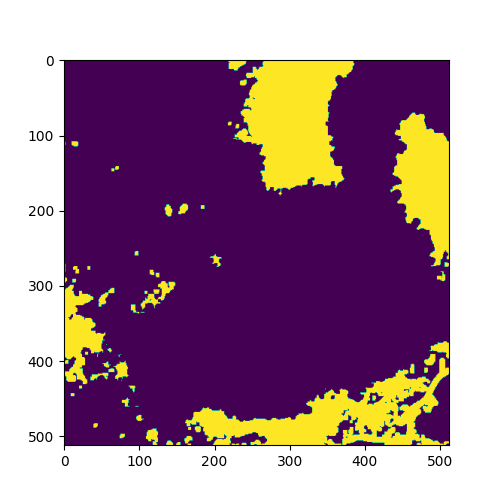

In [5]:
filepath = os.path.abspath(basepath+"/train-multiclass-unet/2class/train/T45_ziwei_binary_small.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['labels'].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(f1['labels'][1, 32])
plt.show()

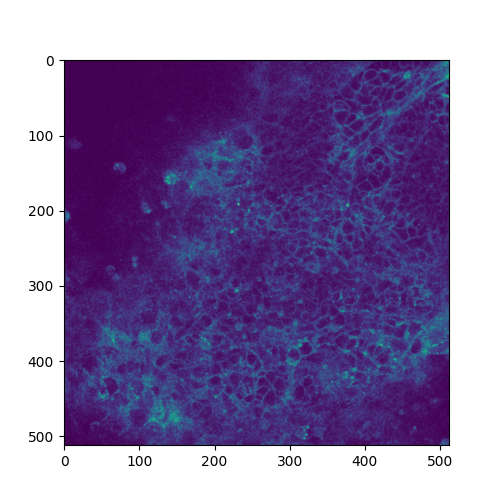

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.imshow()
plt.show()

In [7]:
import napari
viewer = napari.Viewer()
viewer.add_image(f1['labels'][0], colormap='green', name='Label1')
viewer.add_image(f1['labels'][1], colormap='green', name='Label2')
viewer.add_image(f1['raw'][0], colormap='blue', opacity=0.85, name='Membranes')


<Image layer 'Membranes' at 0x2988ecf40>

2023-10-15 22:32:40.334 python3.10[54119:8210993] +[CATransaction synchronize] called within transaction


Keys: <KeysViewHDF5 ['exported_data']>
(1, 62, 512, 512)


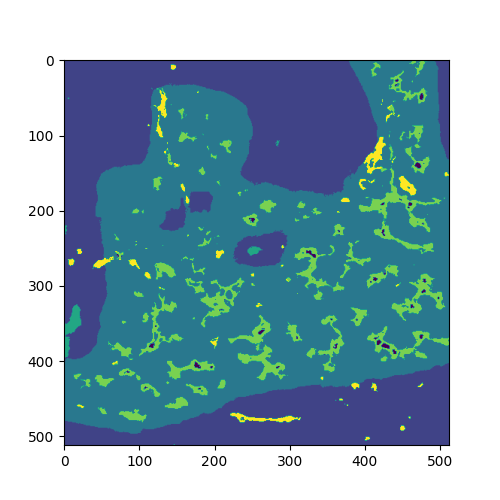

In [50]:
filepath = os.path.abspath("/Volumes/Media/thesis_data/fate-predict-datasets/Alice/annotations/silja_dataset_1_T140_predictions_fused-fused_data_Simple Segmentation.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['exported_data'].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(f1['exported_data'][0, 32])
plt.show()

Keys: <KeysViewHDF5 ['Annotation']>
(62, 512, 512)


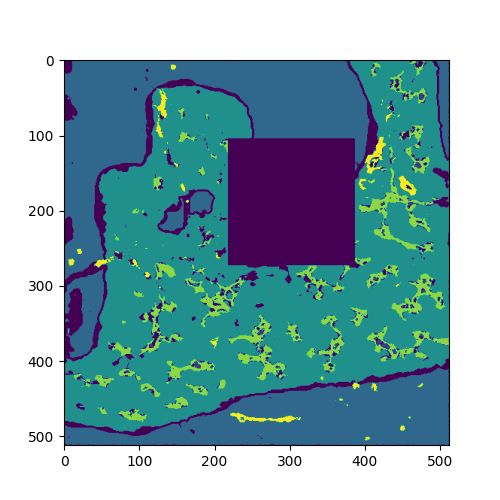

In [53]:
filepath = os.path.abspath("/Volumes/Media/thesis_data/fate-predict-datasets/Alice/annotations/Train_annotation_T140.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['Annotation'].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(f1['Annotation'][32])
plt.show()

Keys: <KeysViewHDF5 ['ziweidata']>
(6, 62, 512, 512)


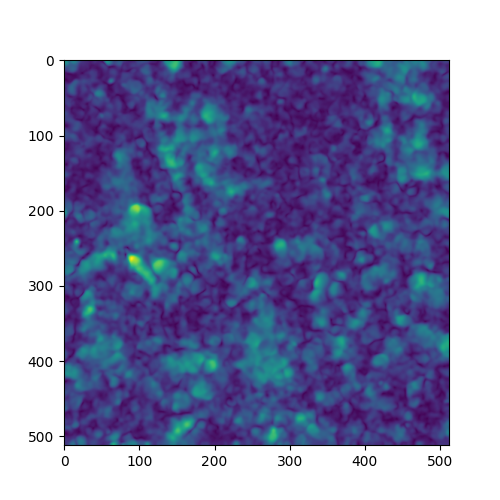

In [64]:
filepath = os.path.abspath("./data/fate-predict-datasets/Alice/annotations/Affine_T140_2op.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['ziweidata'].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(f1['ziweidata'][5, 32])
plt.show()

Keys: <KeysViewHDF5 ['fused_data']>
(4, 62, 512, 512)


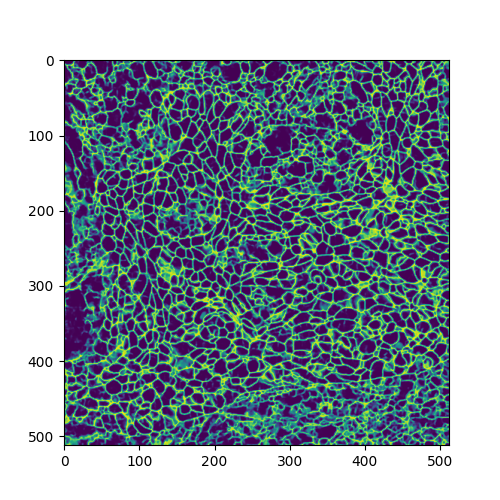

In [67]:
filepath = os.path.abspath("./data/fate-predict-datasets/Alice/raw-data/silja_dataset_1_T140_predictions_fused.h5")
f1 = h5py.File(filepath,'r+')
print("Keys: %s" % f1.keys())
print(f1['fused_data'].shape)

fig = plt.figure(figsize=(5, 5))
plt.imshow(f1['fused_data'][3, 32])
plt.show()

In [11]:
f1 = h5py.File(basepath+'/train-multiclass-unet/3class-4DUnet/train/inputandtarget_T45zw_4D.h5','r+')
print("Keys: %s" % f1.keys())

Keys: <KeysViewHDF5 ['labels', 'raw']>


# Create many small slices from video

In [14]:
f1 = h5py.File(basepath+'/abi-czi-file/data_movie.h5','r+')

In [15]:
f1.keys()

<KeysViewHDF5 ['data_movie']>

In [41]:
f1['data_movie']

<HDF5 dataset "data_movie": shape (158, 4, 62, 512, 512), type "<f8">

In [9]:
t = [10, 20, 40, 60, 80, 100, 120]
z = [40, 30, 20, 30, 30, 30, 20]
x = [100, 200, 300, 300, 100, 100, 200]
y = [200, 100, 300, 100, 300, 300, 100]

In [10]:
i=0
slice = f1['data_movie'][t[i]:t[i]+10, :, z[i]:z[i]+10, x[i]:x[i]+100,y[i]:y[i]+100]

KeyError: "Unable to open object (object 'data_movie' doesn't exist)"

In [69]:
slice.shape

(10, 4, 10, 100, 100)

In [4]:
import zarr
za = zarr.open(basepath+'/abi-czi-file/Alice.zarr', 'a')
za

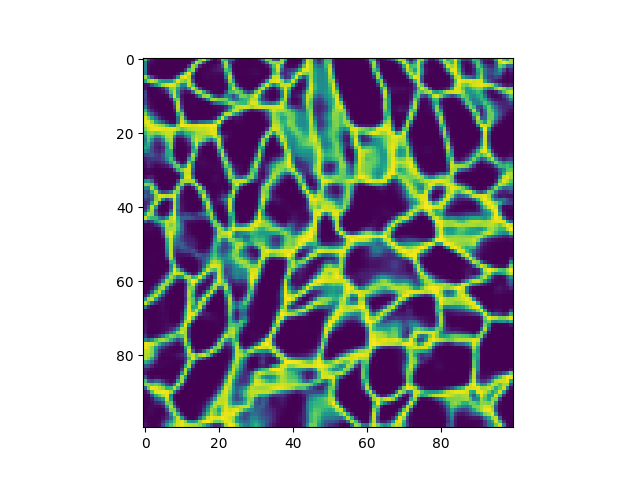

In [7]:
plt.figure()
plt.imshow(za[3, 10, 30, 100:200,100:200])
plt.show()

In [13]:
for i in range(0, 7):
    slice = za[:, t[i]:t[i]+10, z[i]:z[i]+10, x[i]:x[i]+100,y[i]:y[i]+100]
    file = './data/tracking/Alice_slice_%s.h5' % i
    f = h5py.File(file,'w')
    f.create_dataset('data', data=slice)
    f.close()